In [176]:
import pandas as pd
import matplotlib.pyplot as plt

In [177]:
# Chemin vers le fichier CSV
chemin_fichier = "resultats_legifrance_loda.csv"
df_loda = pd.read_csv(chemin_fichier)

In [178]:
df_loda.sample()

,Titre,ID,Date,Nature,Etat,Origine,Date Publication
3801,Arrêté du 9 décembre 2014 modifiant diverses d...,LEGITEXT000030063677_28-12-2014,2014-12-28T00:00:00.000+0000,ARRETE,VIGUEUR,LEGI,2014-12-27T00:00:00.000+0000


In [179]:
df_loda['Date'] = pd.to_datetime(df_loda['Date'])

# On ajoute la colonne mois et l'année via la variable Date (On a arbitrairement écarté Date Publication car les écarts sont de quelques jours uniquement)
df_loda['Mois'] = df_loda['Date'].dt.month.apply(lambda x: f'{x:02}')
df_loda['Année'] = df_loda['Date'].dt.year.astype(str)

df_loda.head()

,Titre,ID,Date,Nature,Etat,Origine,Date Publication,Mois,Année
0,Arrêté du 31 août 2022 fixant les niveaux de p...,LEGITEXT000046244600_21-08-2023,2022-09-01 00:00:00+00:00,ARRETE,VIGUEUR,LEGI,2022-09-01T00:00:00.000+0000,09,2022
1,Arrêté du 30 août 2022 portant création de la ...,LEGITEXT000046664861_28-08-2023,2022-12-02 00:00:00+00:00,ARRETE,VIGUEUR,LEGI,2022-12-01T00:00:00.000+0000,12,2022
2,Arrêté du 30 août 2022 portant création de la ...,LEGITEXT000046664861_02-12-2022,2022-12-02 00:00:00+00:00,ARRETE,VIGUEUR,LEGI,2022-12-01T00:00:00.000+0000,12,2022
3,Arrêté du 29 août 2022 portant création de la ...,LEGITEXT000046666903_02-12-2022,2022-12-02 00:00:00+00:00,ARRETE,VIGUEUR,LEGI,2022-12-01T00:00:00.000+0000,12,2022
4,Arrêté du 22 août 2022 fixant la liste des pos...,LEGITEXT000046230032_21-11-2022,2022-09-01 00:00:00+00:00,ARRETE,VIGUEUR,LEGI,2022-08-31T00:00:00.000+0000,09,2022


In [180]:
print("Valeurs uniques dans la colonne 'année' :")
print(df_loda['Année'].unique())

# Valeurs uniques pour la colonne 'mois'
print("\nValeurs uniques dans la colonne 'mois' :")
print(df_loda['Mois'].unique())

# Valeurs uniques pour la colonne 'Nature'
print("\nValeurs uniques dans la colonne 'Nature' :")
print(df_loda['Nature'].unique())

Valeurs uniques dans la colonne 'année' :
['2022' '2023' '2024' '2021' '2020' '2019' '2222' '2018' '2017' '2016'
 '2015' '2014' '2013' '2012' '2011' '2010' '2009' '2008' '2007' '2006']

Valeurs uniques dans la colonne 'mois' :
['09' '12' '08' '10' '07' '01' '05' '06' '04' '03' '02' '11']

Valeurs uniques dans la colonne 'Nature' :
['ARRETE' 'LOI' 'DECRET' 'ORDONNANCE' 'DECISION']


In [183]:
# Nombre de textes par date
df_résultat = df_loda.groupby(["Année", "Mois"]).size().reset_index(name="Texte")

types = df_loda['Nature'].unique()

for type in types : 
    type_lower = type.capitalize()
    grouped_type = (df_loda[df_loda["Nature"] == type]
        .groupby(["Année", "Mois"])
        .size()
        .reset_index(name=f"{type_lower}")
    )
    df_résultat = pd.merge(df_résultat,
                            grouped_type,
                            how="left",
                            on=["Année", "Mois"]
                        )

# Remplacer les NaN par 0 pour les colonnes ajoutées
df_résultat.fillna(0, inplace=True)

df_result = pd.merge(df_résultat, df_loda[['Année', "Mois", 'Date']], on=['Année',"Mois"], how='left')

df_result['Date'] = pd.to_datetime(df_result['Date']).dt.tz_localize(None)

# Suppression des lignes où 'Année' est 2222
df_result = df_result[df_result['Année'] != 2222]

df_result.head()

,Année,Mois,Texte,Arrete,Loi,Decret,Ordonnance,Decision,Date
0,2006,12,39,4.0,29.0,6.0,0.0,0.0,2006-12-31
1,2006,12,39,4.0,29.0,6.0,0.0,0.0,2006-12-31
2,2006,12,39,4.0,29.0,6.0,0.0,0.0,2006-12-31
3,2006,12,39,4.0,29.0,6.0,0.0,0.0,2006-12-31
4,2006,12,39,4.0,29.0,6.0,0.0,0.0,2006-12-31


In [184]:
df_res = df_result.melt(id_vars=['Année', "Mois", 'Date'],
                  var_name='Indicateur',  
                  value_name='Nombre')  

df_sorted = df_res.sort_values(by='Date')

df_res.head()

,Année,Mois,Date,Indicateur,Nombre
0,2006,12,2006-12-31,Texte,39.0
1,2006,12,2006-12-31,Texte,39.0
2,2006,12,2006-12-31,Texte,39.0
3,2006,12,2006-12-31,Texte,39.0
4,2006,12,2006-12-31,Texte,39.0


In [185]:
df_res['Cumulatif'] = df_res.groupby('Indicateur')['Nombre'].transform('cumsum')

df_res.head()

,Année,Mois,Date,Indicateur,Nombre,Cumulatif
0,2006,12,2006-12-31,Texte,39.0,39.0
1,2006,12,2006-12-31,Texte,39.0,78.0
2,2006,12,2006-12-31,Texte,39.0,117.0
3,2006,12,2006-12-31,Texte,39.0,156.0
4,2006,12,2006-12-31,Texte,39.0,195.0


In [186]:
'''
fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

MY_BUCKET = "anhlinh"
fs.ls(MY_BUCKET)

# Sauvegarde dans S3
MY_BUCKET = "anhlinh"
FILE_PATH_OUT_S3 = f"{MY_BUCKET}/diffusion/______.csv"

with fs.open(FILE_PATH_OUT_S3, "w") as file_out:
    _______.to_csv(file_out)

# Sauvegarde dans S3
MY_BUCKET = "anhlinh"
FILE_PATH_OUT_S3 = f"{MY_BUCKET}/diffusion/_______.csv"

with fs.open(FILE_PATH_OUT_S3, "w") as file_out:
    ______.to_csv(file_out)

fs.ls(f"{MY_BUCKET}/diffusion")
'''

'\nfs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})\n\nMY_BUCKET = "anhlinh"\nfs.ls(MY_BUCKET)\n\n# Sauvegarde dans S3\nMY_BUCKET = "anhlinh"\nFILE_PATH_OUT_S3 = f"{MY_BUCKET}/diffusion/______.csv"\n\nwith fs.open(FILE_PATH_OUT_S3, "w") as file_out:\n    _______.to_csv(file_out)\n\n# Sauvegarde dans S3\nMY_BUCKET = "anhlinh"\nFILE_PATH_OUT_S3 = f"{MY_BUCKET}/diffusion/_______.csv"\n\nwith fs.open(FILE_PATH_OUT_S3, "w") as file_out:\n    ______.to_csv(file_out)\n\nfs.ls(f"{MY_BUCKET}/diffusion")\n'

In [187]:
from visualisation import tracer_evolution_taux

In [188]:
charte_graphique_3 = {
    "Texte": "Magenta",
    "Arrete": "Green",
    "Loi": "Cyan",
    "Decret": "Pink",
    "Ordonnance": "Red",
    "Decision" : "Orange",
}

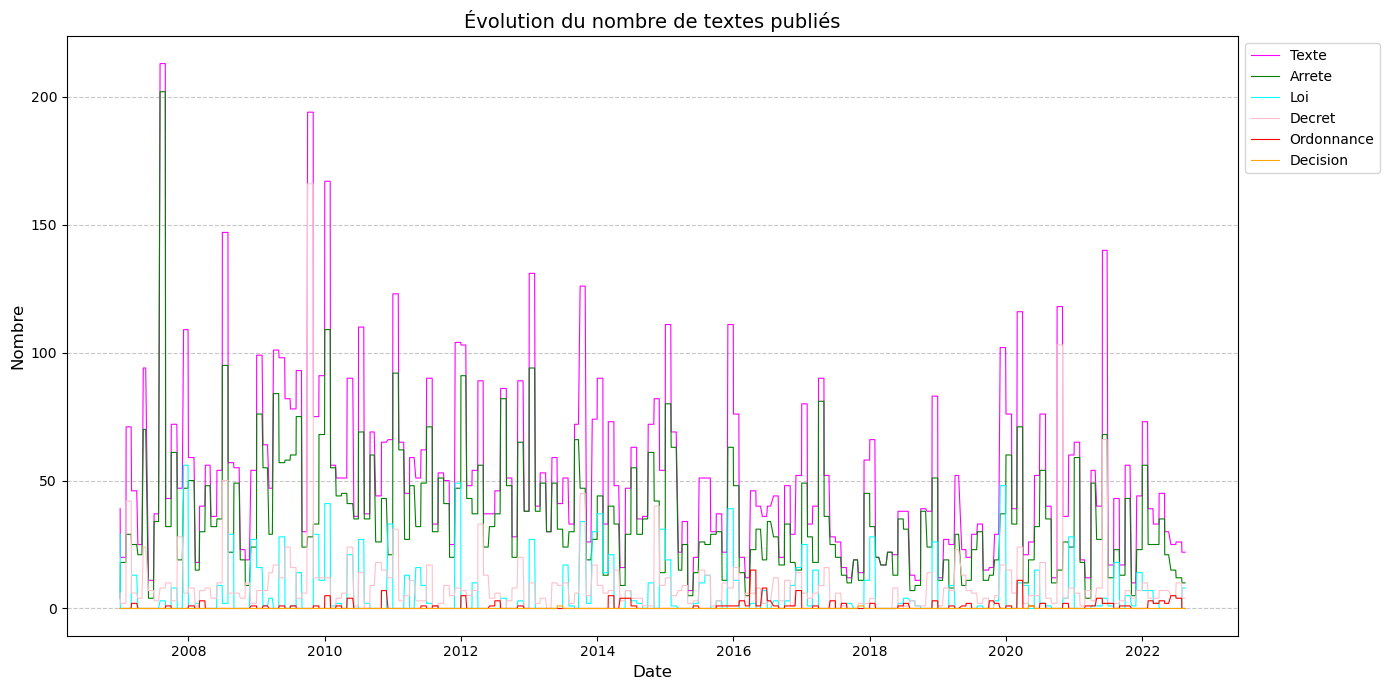

In [189]:
tracer_evolution_taux(df_sorted, charte_graphique_3,  taux = "Nombre", title="Évolution du nombre de textes publiés", xlabel = "Date",ylabel = "Nombre", time_period = ["2006-12-31", "2022-08-31"])

In [190]:
def plot_histogram_and_cumul(df, type):
    """
    Trace un histogramme du nombre de textes par mois pour un type spécifique de texte,
    et une courbe cumulée du nombre de textes.

    Parameters:
    df (DataFrame): Le DataFrame contenant les données.
    type (str): Le type spécifique de texte à analyser (ex: 'LOI', 'DECRET').
    """
    # Filtrer les données par le type de texte
    df_filtered = df[df['Indicateur'] == type]

    # Créer le graphique
    fig, ax = plt.subplots(figsize=(10, 6))

    # Histogramme du nombre de textes par mois
    ax.bar(df_filtered['Date'], df_filtered['Nombre'], label='Nombre de textes par mois')
    
    # Ajouter des titres et des labels
    ax.set_title(f"Nombre de textes et cumul pour le type : {type}", fontsize=14)
    ax.set_xlabel('Mois', fontsize=12)
    ax.set_ylabel('Nombre de textes', fontsize=12)

    # Ajouter une légende
    ax.legend()

    # Afficher le graphique
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


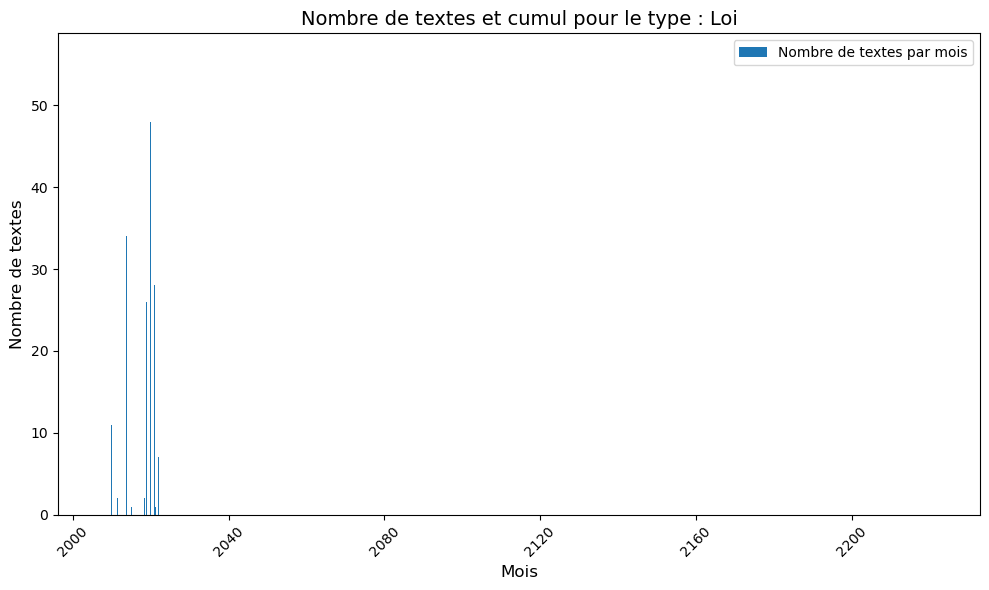

In [191]:
plot_histogram_and_cumul(df_res, 'Loi')